In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pysal
from pysal.weights.util import get_points_array_from_shapefile

# São Paulo Census data analysis

In [ ]:
# Build Census track dataframe reading csv file exported from shapefile
datac = "~/Git/Resolution/SC2010_CEM_RMSP_Income_Race.csv"
dfc = pd.read_csv(datac)
dfc.head()

## Income classes in function of frequency sum

In [ ]:
# slice income columns and sum each column
income = dfc.loc[:,'DR_005':'DR_014']
income.sum()

In [ ]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 8), dpi=300)
plt.xlabel('Income')
plt.ylabel('Frequency sum')
plt.title('Income intervals')

income.sum().plot(kind='bar')

#### Income variables reference

<prep>
```
|DR_005|Up to 1/8 minimum wage
|DR_006|1/8 to 1/4 minimum wage
|DR_007|1/4 to 1/2 minimum wage
|DR_008|1/2 to 1 minimum wage
|DR_009|1 to 2 minimum wages
|DR_010|2 to 3 minimum wages
|DR_011|3 to 5 minimum wages
|DR_012|5 to 10 minimum wages
|DR_013|More than 10 minimum wages
|DR_014|No income
```
<prep>

Groups to be defined.
Probably: up to ¼ m.w.; ¼ to ½; ½ to 1; 1 to 3, 3 to 5, more than 5.

## Color or Race in function of frequency sum

In [ ]:
# slice race and color columns and sum
race = dfc.loc[:,'P3_001':'P3_006']
race.sum()

In [ ]:
# plot Race and color 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Race and Color')
plt.ylabel('Frequency sum')
plt.title('Race and Color intervals')

race.sum().plot(kind='bar')

#### Race and Color variables reference

<prep>
```
|P3_001| Residents - Pessoas Residentes
|P3_002| White - Brancos
|P3_003| Black - Pretos
|P3_004| Asian - Amarelos
|P3_005| “Pardos” - Pardos
|P3_006| Indígenas - Indígenas
```
<prep>

*Black and “Pardos” will be merged in the same group.

# Weighting Areas data

In [ ]:
# Build weighting area dataframe reading csv file exported from shapefile
dataw = "~/Git/Resolution/AP2010_CEM_RMSP_EGP_EDU.csv"
dfw = pd.read_csv(dataw)
dfw.head()

## Education in function of frequency sum

In [ ]:
# slice education columns and sum each column
education = dfw.loc[:,'EDU1':'EDU5']
education.sum()

In [ ]:
# plot education
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Education')
plt.ylabel('Frequency sum')
plt.title('Education intervals')

education.sum().plot(kind='bar')

#### Eduacation variables reference

<prep>
```
|EDU1| No education and incomplete elementary school - Sem instrução ou fundamental incompleto
|EDU2| Complete elementary school and incomplete high school - Fundamental completo e médio incompleto
|EDU3| Complete high school and incomplete college - Médio completo e superior incompleto
|EDU4| Complete College/University - Superior Completo
|EDU5| Not determined - Não determinado 
```
<prep>

## Ocupation in function of frequency sum

In [ ]:
# slice ocupation columns and sum each column
ocupation = dfw.loc[:,'EGP1':'EGP11_']
ocupation.sum()

In [ ]:
# plot ocupation
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 8), dpi=300)
plt.xlabel('Ocupation')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals')

ocupation.sum().plot(kind='bar')

#### Eduacation variables reference

<prep>
```
|EGP1| I. Higher professionals
|EGP2| II. Lower professionals
|EGP3| IIIa. Routine non-manuals, higher degree
|EGP4| IIIb. Routine non-manual, lower degree
|EGP5| IVa2. Proprietors and employers 
|EGP6| IVc1. Rural employers
|EGP7| IVc2. Self-employed farmers and subsistence agriculture workers
|EGP8| V. Technicians and Supervisors of manual workers
|EGP9| VI. Skilled workers
|EGP10| VIIa. Semi- and unskilled workers
|EGP11| VIIb. Agricultural workers
```
<prep>

[SS] Classes EGP6, EGP7 and EGP11 could be grouped in Agricultural workers

# Ocupation groups Microdata

## Histograms

In [2]:
# Build Census Ocupation dataframe reading csv file
dataoccup = "~/Dropbox/Resolution - SP London/Data/Census/São Paulo/occupation_micro_rmsp_2010.csv"
dfoccup = pd.read_csv(dataoccup, na_filter=True)
dfoccup.head()

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,38,39,40,41,42,43,44,103,120,123,124,128,129,130,131,133,134,135,136,137,141,142,143,144,145,148,149,150,151,152,153,181,182,183,184,185) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,mesoreg,microreg,muniat,V0300,RM,AREAP,V1006,PESODOM,V4001,V4002,...,M0668,M6681,M6682,M0669,M6691,M6692,M6693,M0670,M0671,M6800
0,3515,35061,3548708,2,20,3548708005019,1,17.624277,1,13,...,0,0,0,0,0,0,0,0,0,0
1,3515,35059,3518800,8,20,3518800005020,1,20.064749,1,11,...,0,0,0,0,0,0,0,0,0,0
2,3515,35059,3518800,8,20,3518800005020,1,20.064749,1,11,...,0,0,0,0,0,0,0,0,0,0
3,3515,35060,3515004,37,20,3515004005003,1,10.589189,1,11,...,0,0,0,0,0,0,0,0,0,0
4,3515,35061,3550308,47,20,3550308005251,1,24.822914,1,11,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dfocc = dfoccup.loc[:,("AREAP", "PESO", "V6461")]
dfocc["V6461"] = dfocc["V6461"].map(lambda x: str(x)[0:3])
dfocc.tail()
# dfocc[dfocc.AREAP == 3518800005020]
# dftt["valid"] = dftt["PESO"] != dftt["PESODOM"]  #for validation only
# dfocc[dfocc.AREAP == 3503901003001]
# dfocc[(dfocc.AREAP == 3503901003001) & (dfocc.V6461 =='133')]

,AREAP,PESO,V6461
1216606,3550308005247,20.452609,962
1216607,3550308005153,22.266962,962
1216608,3505708005011,10.392491,962
1216609,3550308005225,17.983891,962
1216610,3550308005231,31.898793,962


In [50]:
# dfocc.groupby(["AREAP", "V6461"])["PESO"].sum()

print("Valid area: ", dfoccup["AREAP"].nunique())
print("Valid occup: ", dfoccup["V6461"].nunique())

Valid area:  633
Valid occup:  426


In [8]:
table = pd.pivot_table(dfocc, values='PESO', index=['AREAP'], columns=['V6461'], aggfunc=np.sum, fill_value=0)
dfocc_group = pd.DataFrame(table)
dfocc_group.columns = ['v' + str(col) for col in dfocc_group.columns]
dfocc_group.head()

,v,v0,v110,v111,v112,v121,v122,v131,v132,v133,...,v921,v931,v932,v933,v941,v951,v952,v961,v962,v999
AREAP,,,,,,,,,,,,,,,,,,,,,
3503901003001,8700.076012,172.276816,0.0,0.000000,20.923406,100.269630,51.104727,0.0,55.192262,12.193142,...,0.000000,52.904704,229.796065,80.681330,61.076280,0.000000,42.020441,56.876444,28.551580,0.0
3503901003002,16067.445931,574.709706,0.0,39.201884,36.082065,227.241009,269.334371,0.0,244.266325,34.458556,...,47.960623,107.592847,407.622573,81.798835,152.705570,45.816459,11.376248,80.710342,46.257429,0.0
3503901003003,16234.807887,291.125823,0.0,18.237096,0.000000,162.361431,70.790779,0.0,60.794662,20.880142,...,74.881053,191.249837,450.310900,166.635115,102.263003,0.000000,22.357568,59.909501,129.840212,0.0
3505708005001,7751.571257,423.363347,0.0,68.343015,0.000000,210.212940,133.873387,0.0,59.536643,17.320791,...,15.727559,59.721070,89.186892,34.718656,49.788470,33.254644,0.000000,0.000000,34.691285,0.0
3505708005002,8358.809599,128.659738,0.0,27.016410,20.162472,63.761313,127.005853,0.0,43.261048,0.000000,...,0.000000,45.648686,241.772966,68.819129,53.946535,13.296389,36.063694,53.491661,23.295060,0.0


In [9]:
# slice ocupations columns for second hierarchy level

dfocc_group['v1'] = dfocc_group[['v110','v111','v112','v121','v122','v131','v132','v133','v134','v141','v142','v143']].sum(axis=1)
dfocc_group['v2'] = dfocc_group[['v210','v211','v212','v213','v214','v215','v216','v221','v222','v223','v224','v225','v226','v231','v232',
                                 'v233','v234','v235','v241','v242','v243','v251','v252','v261','v262','v263','v264','v265']].sum(axis=1)
dfocc_group['v3'] = dfocc_group[['v311','v312','v313','v314','v315','v321','v322','v323','v324','v325','v331','v332','v333','v334','v335','v341','v342','v343','v351','v352']].sum(axis=1)
dfocc_group['v4'] = dfocc_group[['v411','v412','v413','v421','v422','v431','v432','v441']].sum(axis=1)
dfocc_group['v5'] = dfocc_group[['v511','v512','v513','v514','v515','v516','v521','v522','v523','v524','v531','v532','v541','v599']].sum(axis=1)
dfocc_group['v6'] = dfocc_group[['v611','v612','v613','v621','v622']].sum(axis=1)
dfocc_group['v7'] = dfocc_group[['v711','v712','v713','v721','v722','v723','v731','v732','v741','v742','v751','v752','v753','v754']].sum(axis=1)
dfocc_group['v8'] = dfocc_group[['v811','v812','v813','v814','v815','v816','v817','v818','v821','v831','v832','v833','v834','v835']].sum(axis=1)
dfocc_group['v9'] = dfocc_group[['v911','v912','v921','v931','v932','v933','v941','v951','v952','v961','v962','v999']].sum(axis=1)

In [ ]:
# Labels


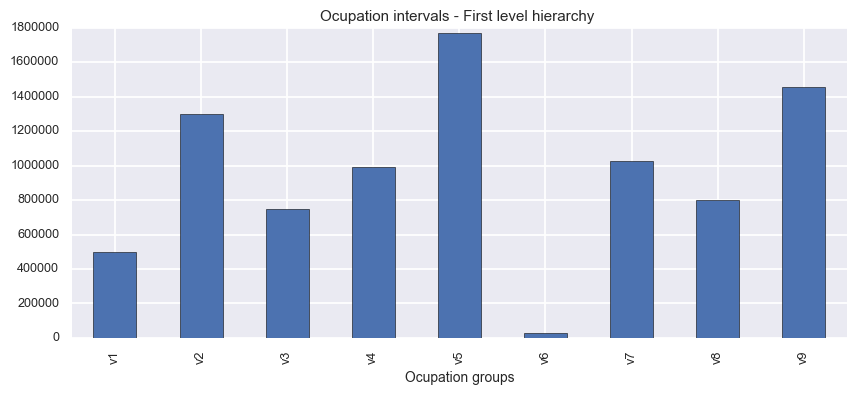

In [11]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 4), dpi=300)
plt.xlabel('Ocupation groups')
plt.title('Ocupation intervals - First level hierarchy ')
plt.ticklabel_format(style='plain', axis='y')

fig1 = dfocc_group.loc[:,"v1":"v9"].sum().plot(kind='bar')
plt.xlabel('Ocupation groups')
# fig1.set_xticklabels(labelsl1)

In [12]:
# slice ocupations columns for Third hierarchy level

dfocc_group['v11'] = dfocc_group[['v110','v111','v112']].sum(axis=1)                                   
dfocc_group['v12'] = dfocc_group[['v121','v122']].sum(axis=1)                                          
dfocc_group['v13'] = dfocc_group[['v131','v132','v133','v134']].sum(axis=1)                            
dfocc_group['v14'] = dfocc_group[['v141','v142','v143']].sum(axis=1)                                   
dfocc_group['v21'] = dfocc_group[['v210','v211','v212','v213','v214','v215','v216']].sum(axis=1)       
dfocc_group['v22'] = dfocc_group[['v221','v222','v223','v224','v225','v226']].sum(axis=1)              
dfocc_group['v23'] = dfocc_group[['v231','v232','v233','v234','v235']].sum(axis=1)                     
dfocc_group['v24'] = dfocc_group[['v241','v242','v243']].sum(axis=1)                                   
dfocc_group['v25'] = dfocc_group[['v251','v252']].sum(axis=1)                                          
dfocc_group['v26'] = dfocc_group[['v261','v262','v263','v264','v265']].sum(axis=1)                     
# dfocc_group['v29'] = dfocc_group[['v299']].sum(axis=1)                                                 
dfocc_group['v31'] = dfocc_group[['v311','v312','v313','v314','v315']].sum(axis=1)                     
dfocc_group['v32'] = dfocc_group[['v321','v322','v323','v324','v325']].sum(axis=1)                     
dfocc_group['v33'] = dfocc_group[['v331','v332','v333','v334','v335']].sum(axis=1)                     
dfocc_group['v34'] = dfocc_group[['v341','v342','v343']].sum(axis=1)                                   
dfocc_group['v35'] = dfocc_group[['v351','v352']].sum(axis=1)                                          
dfocc_group['v41'] = dfocc_group[['v411','v412','v413','v421']].sum(axis=1)                            
dfocc_group['v42'] = dfocc_group[['v422']].sum(axis=1)                                                 
dfocc_group['v43'] = dfocc_group[['v431','v432']].sum(axis=1)                                          
dfocc_group['v44'] = dfocc_group[['v441']].sum(axis=1)                                                 
dfocc_group['v51'] = dfocc_group[['v511','v512','v513','v514','v515','v516']].sum(axis=1)              
dfocc_group['v52'] = dfocc_group[['v521','v522','v523','v524']].sum(axis=1)                            
dfocc_group['v53'] = dfocc_group[['v531','v532']].sum(axis=1)                                          
dfocc_group['v54'] = dfocc_group[['v541']].sum(axis=1)                                                 
dfocc_group['v59'] = dfocc_group[['v599']].sum(axis=1)                                                 
dfocc_group['v61'] = dfocc_group[['v611','v612','v613']].sum(axis=1)                                   
dfocc_group['v62'] = dfocc_group[['v621','v622']].sum(axis=1)                                          
dfocc_group['v71'] = dfocc_group[['v711','v712','v713']].sum(axis=1)                                   
dfocc_group['v72'] = dfocc_group[['v721','v722','v723']].sum(axis=1)                                   
dfocc_group['v73'] = dfocc_group[['v731','v732']].sum(axis=1)                                          
dfocc_group['v74'] = dfocc_group[['v741','v742']].sum(axis=1)                                          
dfocc_group['v75'] = dfocc_group[['v751','v752','v753','v754']].sum(axis=1)                            
dfocc_group['v81'] = dfocc_group[['v811','v812','v813','v814','v815','v816','v817','v818']].sum(axis=1)
dfocc_group['v82'] = dfocc_group[['v821']].sum(axis=1)                                                 
dfocc_group['v83'] = dfocc_group[['v831','v832','v833','v834','v835']].sum(axis=1)                     
dfocc_group['v91'] = dfocc_group[['v911','v912']].sum(axis=1)                                          
dfocc_group['v92'] = dfocc_group[['v921']].sum(axis=1)                                                 
dfocc_group['v93'] = dfocc_group[['v931','v932','v933']].sum(axis=1)                                   
dfocc_group['v94'] = dfocc_group[['v941']].sum(axis=1)                                                 
dfocc_group['v95'] = dfocc_group[['v951','v952']].sum(axis=1)                                          
dfocc_group['v96'] = dfocc_group[['v961','v962']].sum(axis=1)                                          
dfocc_group['v99'] = dfocc_group[['v999']].sum(axis=1)                                                 

In [ ]:
# Labels


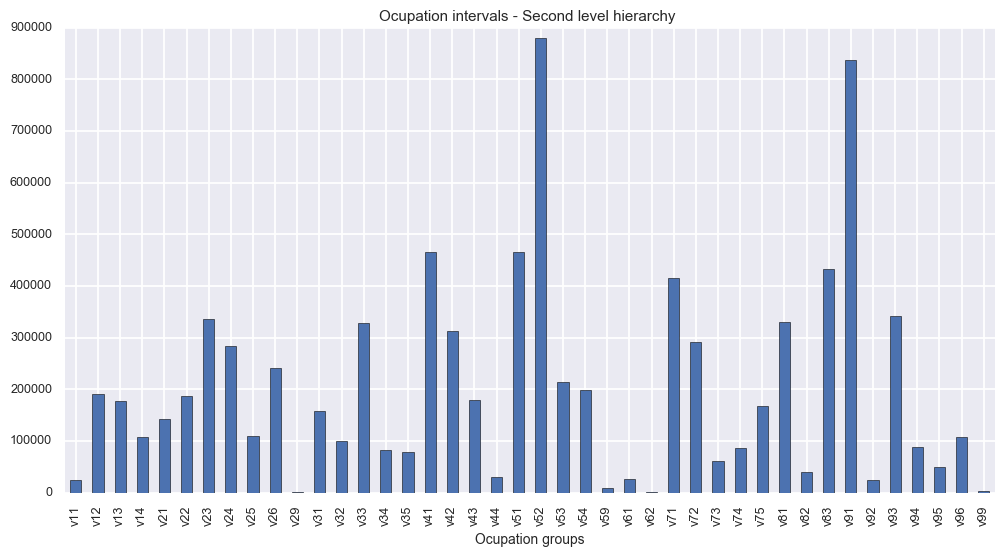

In [13]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 6), dpi=300)
plt.xlabel('Ocupation groups')
plt.title('Ocupation intervals - Second level hierarchy ')
plt.ticklabel_format(style='plain', axis='y')

fig1 = dfocc_group.loc[:,"v11":"v99"].sum().plot(kind='bar')
plt.xlabel('Ocupation groups')
# fig1.set_xticklabels(labelsl1)

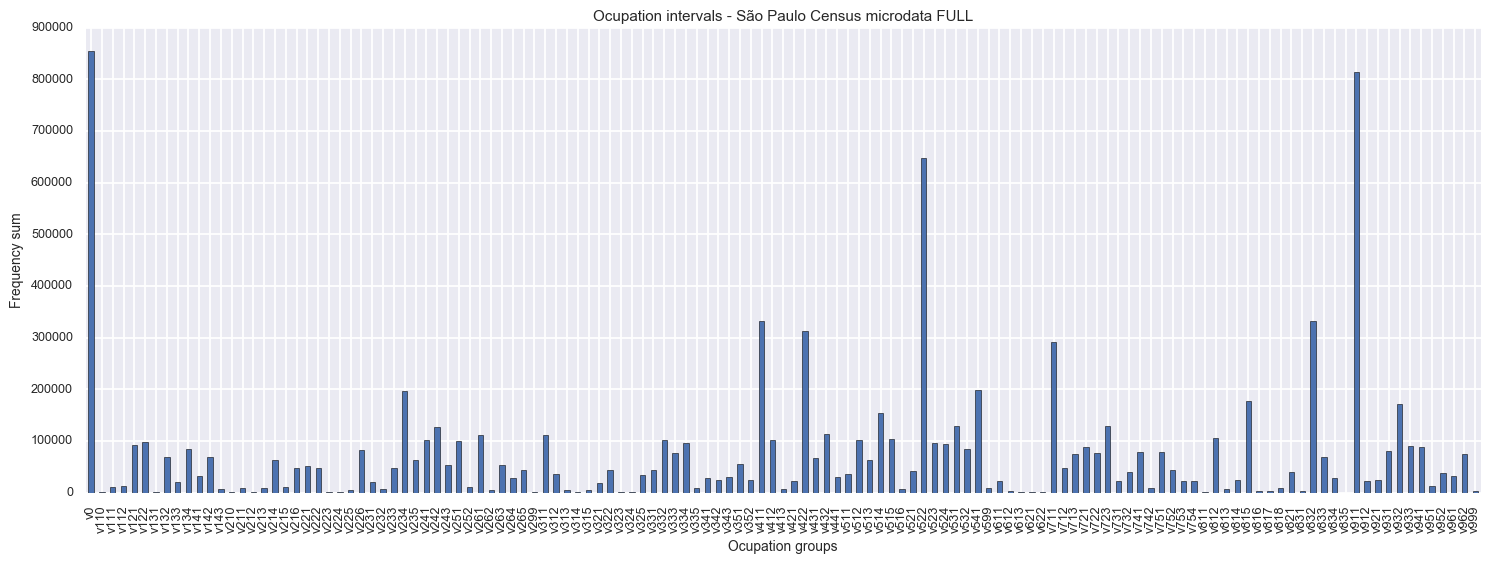

In [14]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(18, 6), dpi=300)
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals - São Paulo Census microdata FULL')
plt.ticklabel_format(style='plain', axis='y')

dfocc_group.loc[:,"v0":"v999"].sum().plot(kind='bar')
plt.xlabel('Ocupation groups')

## Pearson Correlations

In [16]:
# Slice data frame to get proportion data columns
cor_occup_hier1 = dfocc_group.loc[:,'v1':'v9'].corr()
cor_occup_hier1

,v1,v2,v3,v4,v5,v6,v7,v8,v9
v1,1.000000,0.928663,0.709763,0.268142,0.062998,-0.095286,-0.289158,-0.197986,-0.252528
v2,0.928663,1.000000,0.734938,0.270854,0.069722,-0.105598,-0.307261,-0.214794,-0.282616
v3,0.709763,0.734938,1.000000,0.754241,0.528050,-0.158945,0.138803,0.269647,0.076462
v4,0.268142,0.270854,0.754241,1.000000,0.786916,-0.127938,0.529361,0.660975,0.446452
v5,0.062998,0.069722,0.528050,0.786916,1.000000,-0.023670,0.729268,0.750952,0.733449
v6,-0.095286,-0.105598,-0.158945,-0.127938,-0.023670,1.000000,0.095952,0.010381,0.175590
v7,-0.289158,-0.307261,0.138803,0.529361,0.729268,0.095952,1.000000,0.848002,0.879046
v8,-0.197986,-0.214794,0.269647,0.660975,0.750952,0.010381,0.848002,1.000000,0.748879
v9,-0.252528,-0.282616,0.076462,0.446452,0.733449,0.175590,0.879046,0.748879,1.000000


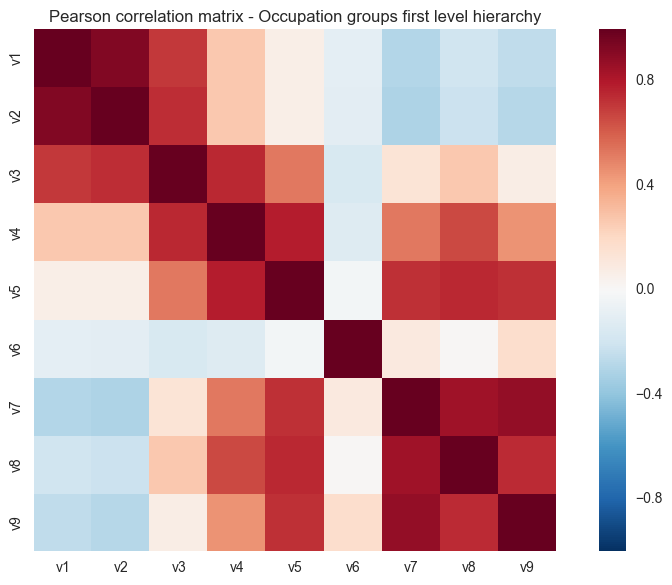

In [17]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
f1, ax1 = plt.subplots(figsize=(9, 6), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups first level hierarchy')
sns.heatmap(cor_occup_hier1, square=True)
f1.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_.png")

In [18]:
# Slice data frame to get proportion data columns
cor_occup_hier2 = dfocc_group.loc[:,'v11':'v99'].corr()
cor_occup_hier2.head()

,v11,v12,v13,v14,v21,v22,v23,v24,v25,v26,...,v81,v82,v83,v91,v92,v93,v94,v95,v96,v99
v11,1.000000,0.676888,0.689306,0.485049,0.709010,0.657036,0.452358,0.603044,0.455122,0.759254,...,-0.261328,-0.201099,-0.222287,-0.134719,-0.060237,-0.264499,-0.213040,-0.108939,-0.214782,0.044887
v12,0.676888,1.000000,0.875933,0.686108,0.842322,0.785891,0.706971,0.879850,0.761829,0.816510,...,-0.226015,-0.168157,-0.109013,-0.175915,-0.139982,-0.282232,-0.203983,0.013429,-0.187727,0.104426
v13,0.689306,0.875933,1.000000,0.737071,0.865985,0.828723,0.707835,0.830280,0.755031,0.866245,...,-0.253375,-0.204974,-0.171848,-0.240063,-0.113541,-0.338493,-0.216275,-0.022775,-0.189298,0.121189
v14,0.485049,0.686108,0.737071,1.000000,0.669560,0.662033,0.690013,0.678201,0.582400,0.663235,...,-0.035130,-0.057189,0.035147,-0.128583,-0.045285,-0.133637,-0.035147,0.142235,0.057286,0.160489
v21,0.709010,0.842322,0.865985,0.669560,1.000000,0.898161,0.685910,0.853935,0.741660,0.897357,...,-0.304742,-0.244868,-0.266531,-0.265363,-0.108345,-0.368023,-0.252818,-0.037711,-0.252066,0.135461


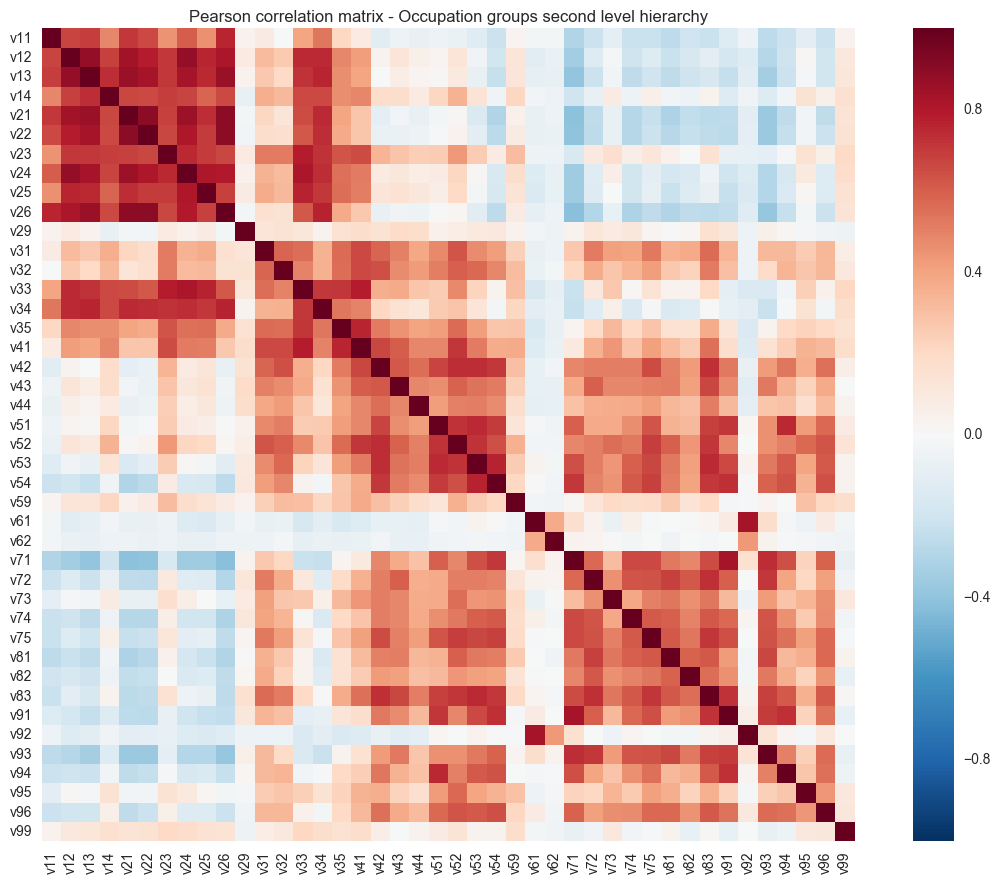

In [19]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12, 9), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups second level hierarchy')
f2 = sns.heatmap(cor_occup_hier2, square=True)
# f2.set_xticklabels(labelsl2)
# f2.set_yticklabels(reversed(labelsl2))
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_hierl2.png")

In [20]:
# Slice data frame to get proportion data columns
cor_occup_hier3 = dfocc_group.loc[:,'v110':'v999'].corr()
cor_occup_hier3.head()

,v110,v111,v112,v121,v122,v131,v132,v133,v134,v141,...,v921,v931,v932,v933,v941,v951,v952,v961,v962,v999
v110,1.000000,0.151553,0.109021,0.069932,0.130582,0.021817,0.133633,0.116185,0.119652,0.026742,...,-0.041091,-0.082339,-0.048864,0.040233,-0.071041,-0.037844,0.000113,-0.022293,-0.053794,0.043151
v111,0.151553,1.000000,0.435541,0.467469,0.459892,0.175977,0.412085,0.435268,0.535763,0.261144,...,-0.025066,-0.175069,-0.151649,-0.116053,-0.159717,-0.084294,-0.049186,-0.137655,-0.108388,0.117356
v112,0.109021,0.435541,1.000000,0.580927,0.645249,0.397439,0.488921,0.531825,0.619758,0.228471,...,-0.064248,-0.186371,-0.238748,-0.190422,-0.194149,-0.127617,-0.082377,-0.182205,-0.173841,-0.005971
v121,0.069932,0.467469,0.580927,1.000000,0.852122,0.227652,0.724370,0.721610,0.767812,0.470183,...,-0.125151,-0.249785,-0.208013,-0.092067,-0.182975,-0.028687,0.067666,-0.192256,-0.077425,0.098519
v122,0.130582,0.459892,0.645249,0.852122,1.000000,0.277184,0.747991,0.745983,0.814520,0.427946,...,-0.143230,-0.302886,-0.302626,-0.163353,-0.208179,-0.081216,-0.001366,-0.240633,-0.146444,0.102269


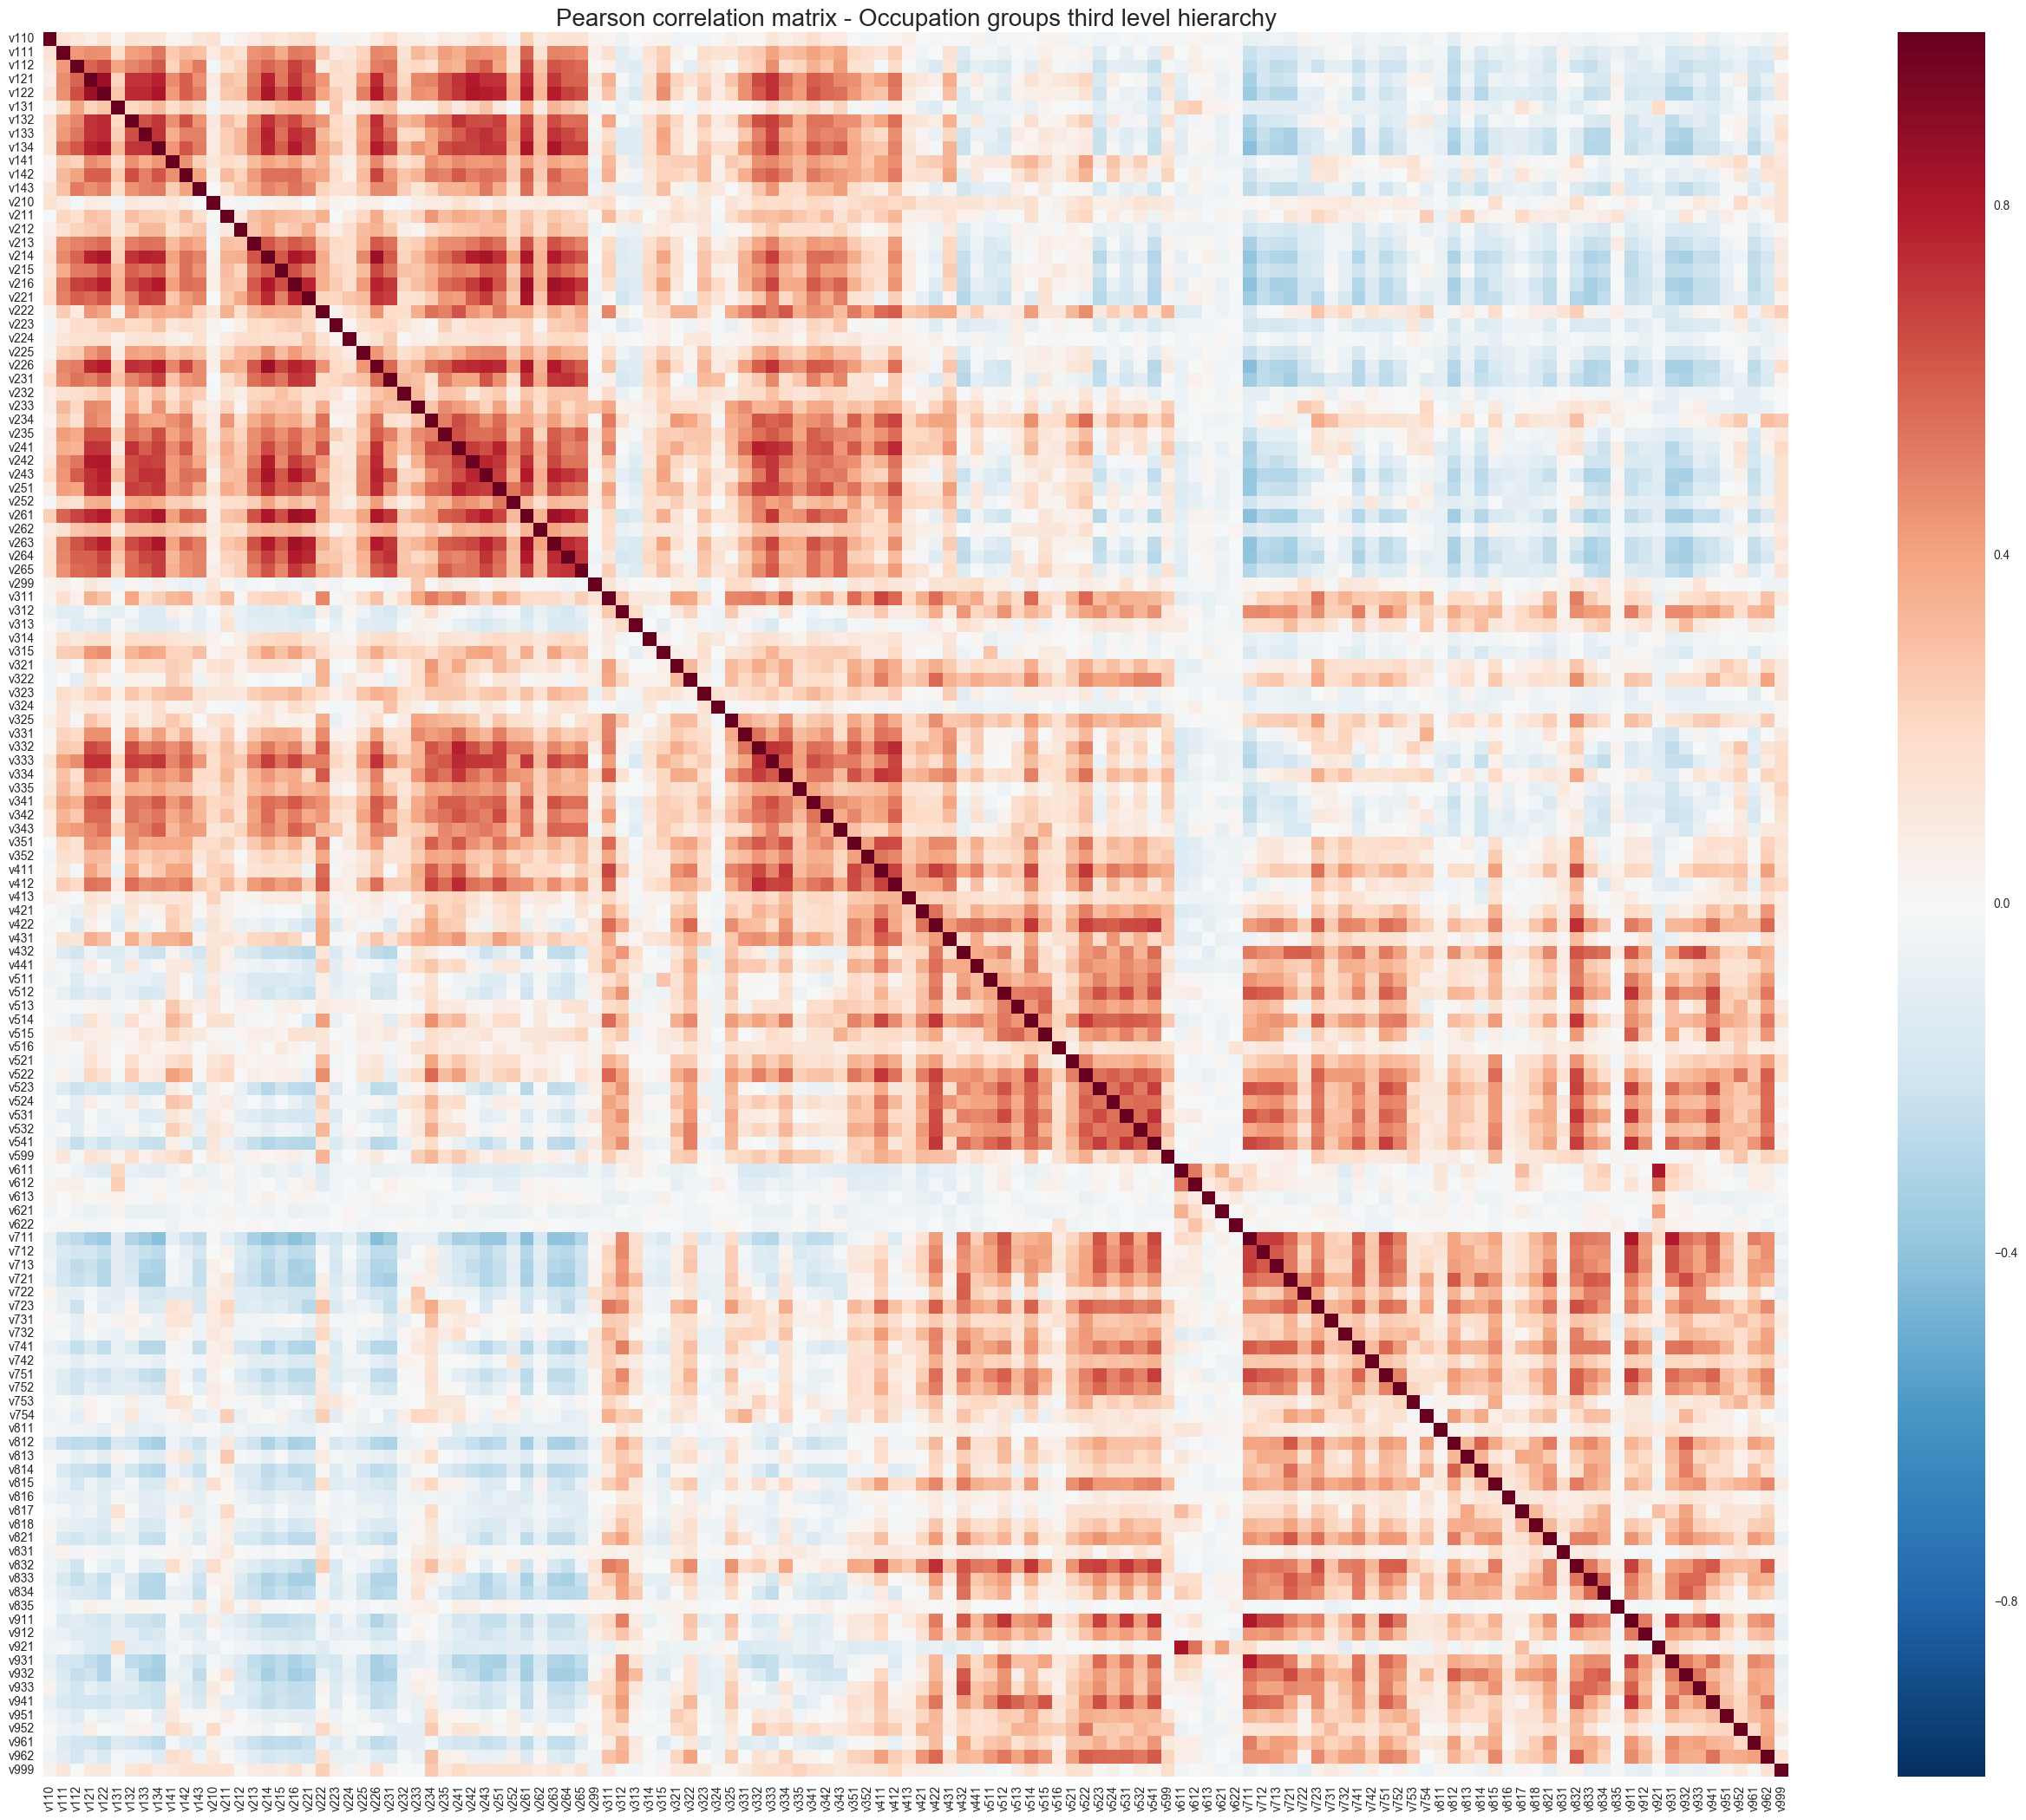

In [21]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups third level hierarchy', fontsize=20)
f3 = sns.heatmap(cor_occup_hier3, square=True)
# f3.set_xticklabels(labelsl3)
# f3.set_yticklabels(reversed(labelsl3))
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_hierl3.png")

## Moran I Correlations

In [22]:
# Read dbf associated with the same shape file
# Obs: QGIS field lenght limit(10) changed column names during join

def calc_moran(arrayi, arrayj, weight):
    moran = pysal.Moran_BV(arrayi, arrayj, weight, permutations=999)
    result = moran.I
    pvalue = moran.p_z_sim
    return result, pvalue


def block_processing(i, weight, varnames, file):
    morans = []
    pvalues = []
    
    for item in varnames:
        j = np.array(file.by_col[item])
        serie = calc_moran(i,j,weight)
        moran = serie[0]
        pvalue = serie[1]
        morans.append(moran)
        pvalues.append(pvalue)
    return morans, pvalues


def calc_moran_matrix(varnames, weight, file):
    moran_matrix = []
    pvalue_matrix = []
    
    for item in varnames:
        i = np.array(file.by_col[item])
        result = block_processing(i,weight, varnames, file)
        res_moran = result[0]
        res_pvalue = result[1]
        moran_matrix.append(res_moran)
        pvalue_matrix.append(res_pvalue)
    return moran_matrix, pvalue_matrix

In [23]:
# Save data with new columns to csv
csvoccup = "~/Dropbox/Resolution - SP London/Data/Census/São Paulo/occupation_grouped_rmsp_2010.csv"
dfocc_group.loc[:,'v110':'v99'].to_csv(csvoccup)  #save to csv

**Based on Queen Contiguity Weight**

Prepares data reading shape file for OA London and computes Contiguity Based Weights using Queen method

In [24]:
shp_path1 = "/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "São Paulo/WeightingAreas_Shapefile/AP2010_CEM_RMSP_EGP_EDU_OCC.shp"
weight_cont_occup = pysal.queen_from_shapefile(shp_path1)

**Histogram showing the distribuition of neighbors in queen weight**

<Container object of 14 artists>

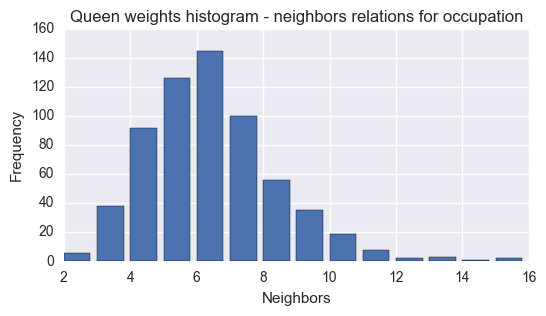

In [25]:
% matplotlib inline
sns.set(context="notebook")
plt.figure(facecolor="white", figsize=(6, 3), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Queen weights histogram - neighbors relations for occupation')
plt.bar(*zip(*weight_cont_occup.histogram))

**Compute Bivariate Moran for all elements of occupation groups**

Variables are compared pairwised resulting on a matrix 999 random permutations are used for calculation of pseudo p_values

In [26]:
# Call main function to compute Moran and P-values ethnic groups
    
f1 = pysal.open("/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "São Paulo/WeightingAreas_Shapefile/AP2010_CEM_RMSP_EGP_EDU_OCC_CENT.dbf")

In [27]:
var_occup_hier1 = list(cor_occup_hier1)
matrices_occupl1 = calc_moran_matrix(var_occup_hier1, weight_cont_occup, f1)

In [28]:
dfmoran_occup_hier1 = pd.DataFrame(matrices_occupl1[0], columns=var_occup_hier1, index=var_occup_hier1)
dfmoran_occup_hier1.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9
v1,0.658996,0.662566,0.469260,0.138143,-0.012906,-0.161905,-0.310592,-0.216931,-0.241515
v2,0.655342,0.695749,0.476316,0.132951,-0.006804,-0.167525,-0.330515,-0.232990,-0.260382
v3,0.473991,0.489880,0.567814,0.418411,0.243948,-0.240197,-0.058301,0.084393,-0.055280
v4,0.145668,0.143840,0.426868,0.532497,0.400318,-0.218732,0.213586,0.342085,0.180836
v5,-0.001289,0.000601,0.250498,0.402184,0.450314,-0.146130,0.279385,0.352256,0.290153


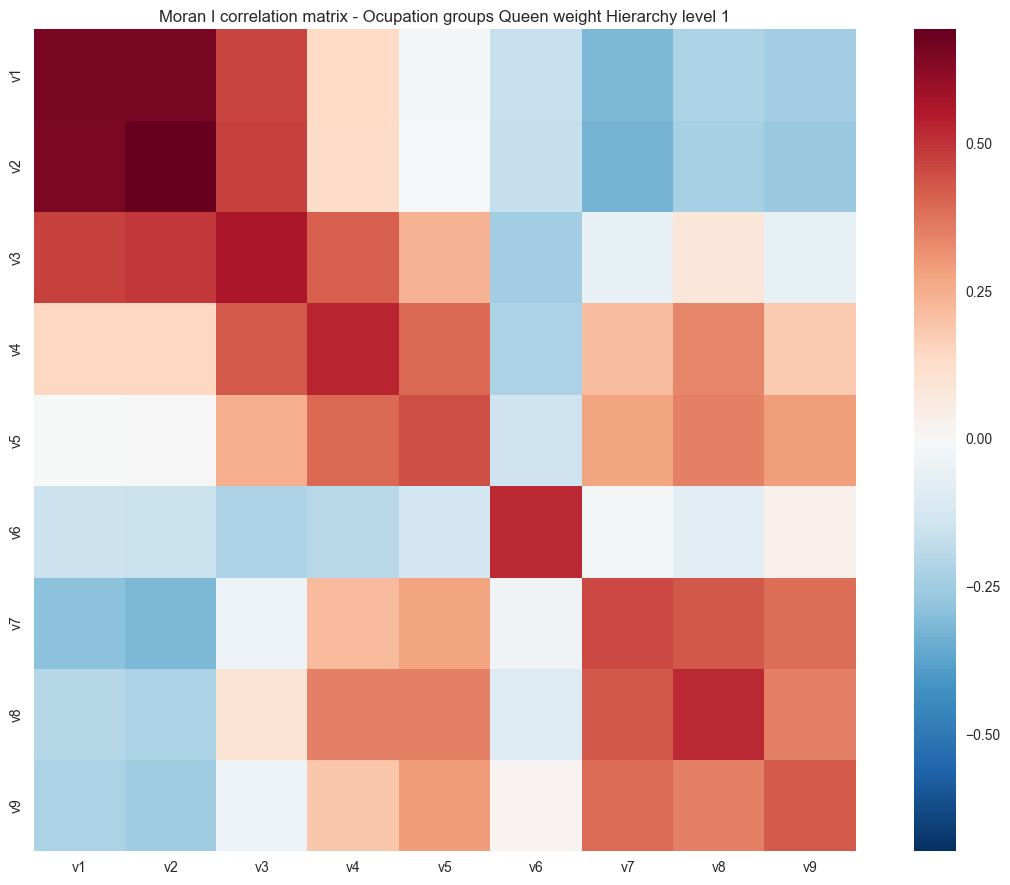

In [30]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12,9), dpi=300)
plt.title('Moran I correlation matrix - Ocupation groups Queen weight Hierarchy level 1')
h1 = sns.heatmap(dfmoran_occup_hier1, square=True)
# h1.set_xticklabels(labelsl1, rotation='vertical')
# h1.set_yticklabels(reversed(labelsl1), rotation='horizontal')
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl1.png")

**Moran Bivariate Queen weight for second hierarchy level**

In [31]:
var_occup_hier2 = list(cor_occup_hier2)
matrices_occupl2 = calc_moran_matrix(var_occup_hier2, weight_cont_occup, f1)

In [32]:
dfmoran_occup_hier2 = pd.DataFrame(matrices_occupl2[0], columns=var_occup_hier2, index=var_occup_hier2)
dfmoran_occup_hier2.head()

,v11,v12,v13,v14,v21,v22,v23,v24,v25,v26,...,v81,v82,v83,v91,v92,v93,v94,v95,v96,v99
v11,0.401050,0.449145,0.480828,0.316721,0.496641,0.465144,0.288599,0.430008,0.368205,0.537562,...,-0.244494,-0.194429,-0.208424,-0.151052,-0.068649,-0.244233,-0.157938,-0.023119,-0.178393,0.065033
v12,0.452429,0.616879,0.621938,0.445508,0.606493,0.558923,0.435836,0.600898,0.540556,0.612028,...,-0.215748,-0.161969,-0.117484,-0.151740,-0.143741,-0.257851,-0.143756,0.019334,-0.141841,0.099540
v13,0.476025,0.612061,0.667638,0.483738,0.645206,0.599016,0.463147,0.607815,0.563025,0.662165,...,-0.248268,-0.201500,-0.174065,-0.213855,-0.126061,-0.316707,-0.177916,0.009617,-0.155346,0.125438
v14,0.318618,0.453091,0.499478,0.442908,0.490212,0.473969,0.396988,0.481812,0.428333,0.501341,...,-0.122366,-0.114232,-0.087775,-0.177335,-0.095264,-0.245986,-0.086580,0.122879,-0.025289,0.169535
v21,0.499104,0.597205,0.646683,0.475117,0.680795,0.645591,0.435254,0.606745,0.550412,0.690082,...,-0.285539,-0.216456,-0.246880,-0.229434,-0.115393,-0.335932,-0.189435,-0.016998,-0.202184,0.101572


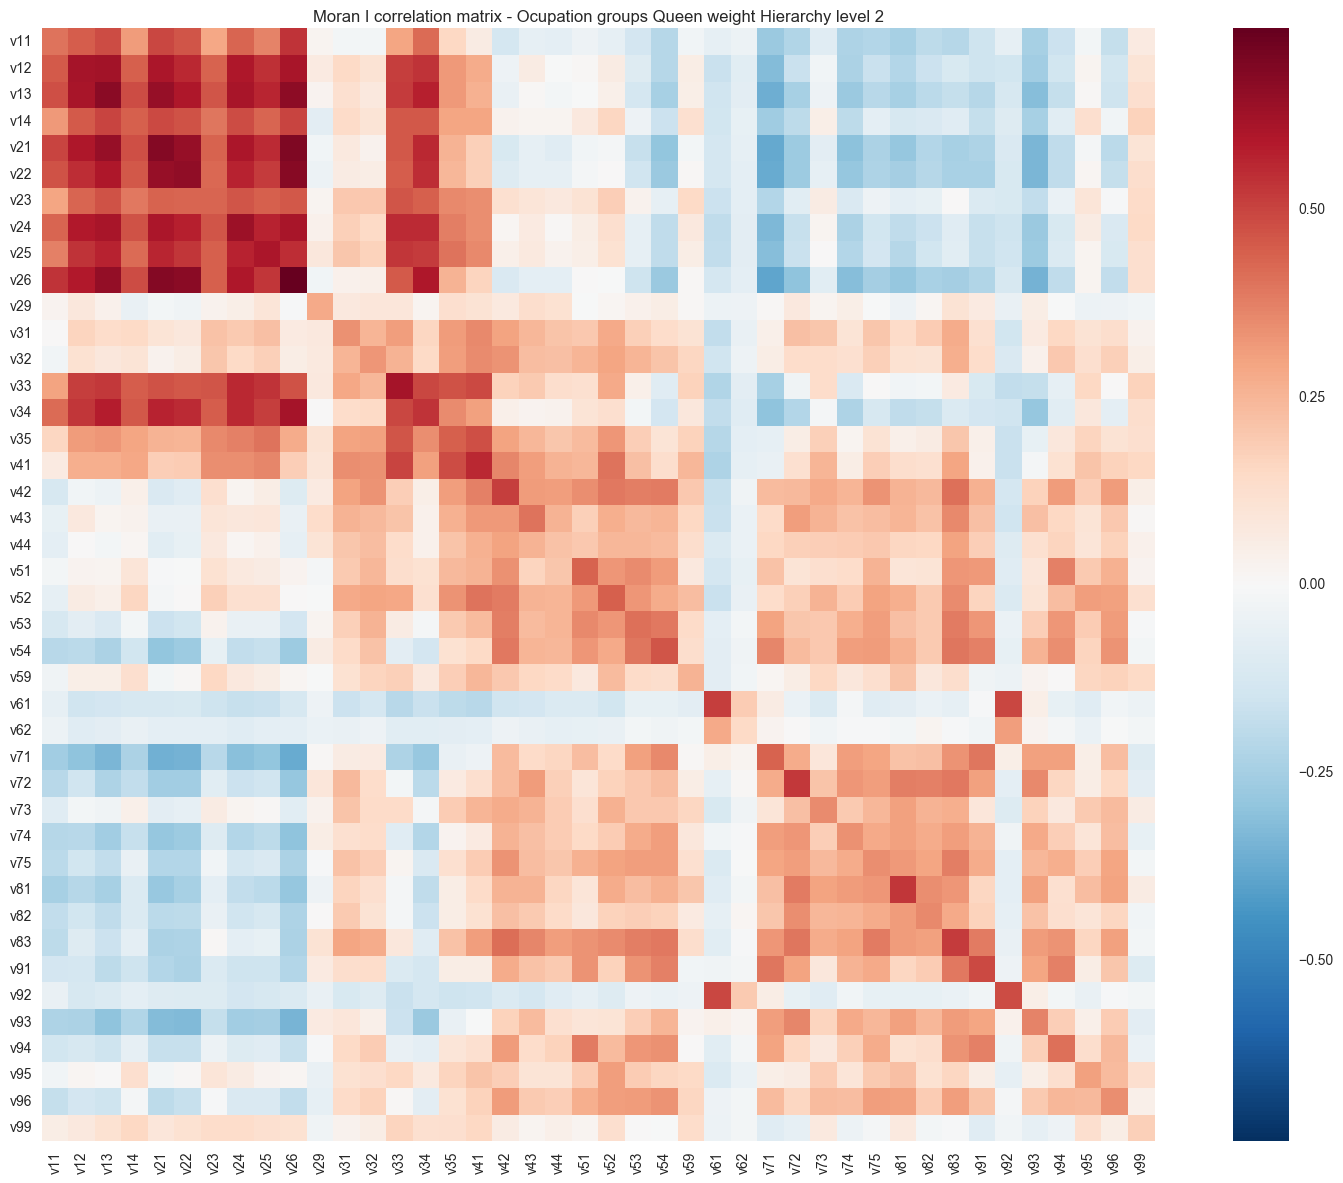

In [33]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(16,12), dpi=300)
plt.title('Moran I correlation matrix - Ocupation groups Queen weight Hierarchy level 2')
h2 = sns.heatmap(dfmoran_occup_hier2, square=True)
# h2.set_xticklabels(labelsl2)
# h2.set_yticklabels(reversed(labelsl2))
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl2.png")

**Moran Bivariate Queen weight for third hierarchy level**

In [39]:
var_occup_hier3 = list(cor_occup_hier3)
matrices_occupl3 = calc_moran_matrix(var_occup_hier3, weight_cont_occup, f1)

In [40]:
dfmoran_occup_hier3 = pd.DataFrame(matrices_occupl3[0], columns=var_occup_hier3, index=var_occup_hier3)
dfmoran_occup_hier3.head()

,v110,v111,v112,v121,v122,v131,v132,v133,v134,v141,...,v921,v931,v932,v933,v941,v951,v952,v961,v962,v999
v110,0.087324,0.075811,0.102765,0.062986,0.081284,0.040599,0.048693,0.092712,0.089435,0.058955,...,-0.043408,-0.057511,-0.040611,-0.000761,-0.047502,-0.019011,-0.030074,-0.015163,-0.042738,-0.006799
v111,0.073739,0.227133,0.229102,0.257915,0.299434,0.105233,0.238211,0.269179,0.342132,0.180842,...,-0.053130,-0.188112,-0.179611,-0.093838,-0.153572,-0.078879,0.021589,-0.111760,-0.117727,0.077952
v112,0.096496,0.218129,0.391424,0.386281,0.454789,0.177726,0.348598,0.421924,0.458329,0.178314,...,-0.060264,-0.183358,-0.222754,-0.123668,-0.125403,-0.055596,-0.014167,-0.143368,-0.135550,0.045538
v121,0.066412,0.260022,0.388296,0.523291,0.563208,0.125464,0.486652,0.475854,0.542266,0.304074,...,-0.135051,-0.257189,-0.235609,-0.055971,-0.143812,-0.034779,0.049390,-0.128009,-0.077500,0.106600
v122,0.084492,0.302091,0.458117,0.561819,0.625220,0.155688,0.530036,0.536515,0.608786,0.321766,...,-0.141268,-0.264196,-0.277206,-0.097671,-0.133517,-0.055981,0.020828,-0.175562,-0.107079,0.086215


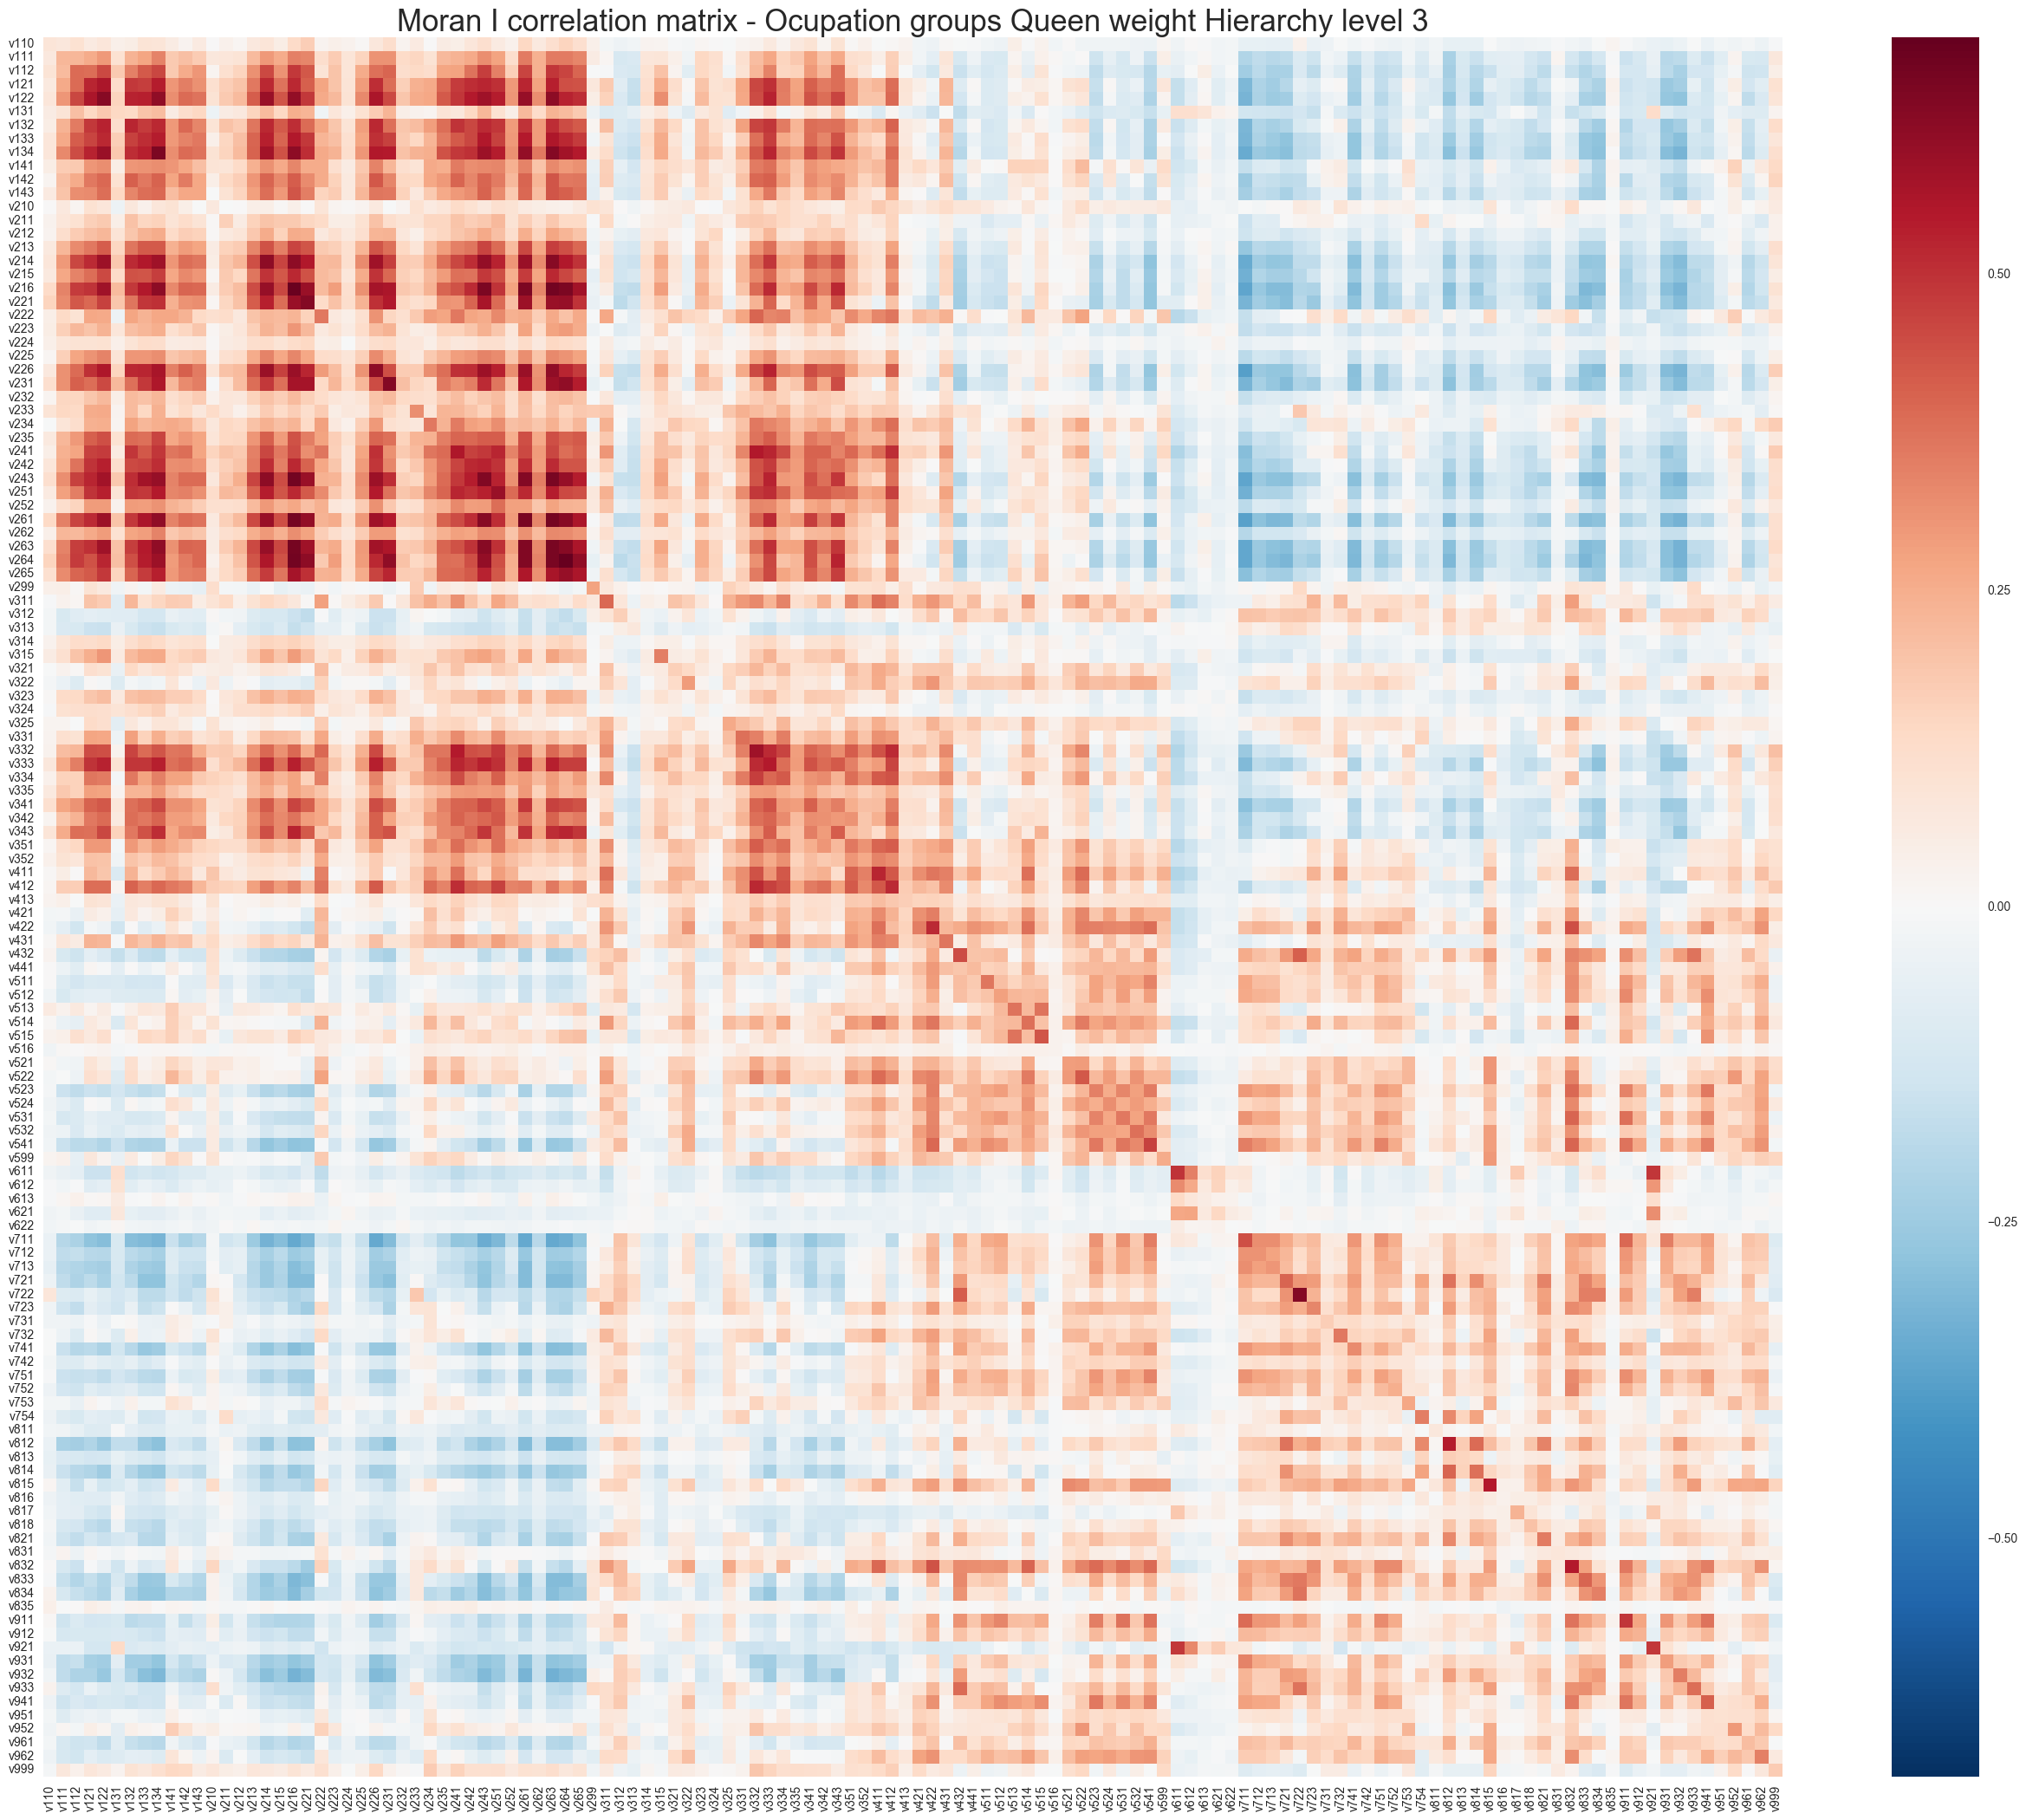

In [41]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Moran I correlation matrix - Ocupation groups Queen weight Hierarchy level 3', fontsize=25)
h3 = sns.heatmap(dfmoran_occup_hier3, square=True)
# h3.set_xticklabels(labelsl3)
# h3.set_yticklabels(reversed(labelsl3))
plt.tight_layout()
plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl3.png")